### 1. Construct a Bayesian network considering medical data. Use this model to demonstrate the diagnosis of heart patients using standard Heart Disease Data Set.  

In [1]:
import pandas as pd
data=pd.read_csv("heartdisease.csv")
heart_disease=pd.DataFrame(data)
print(heart_disease)

    age  Gender  Family  diet  Lifestyle  cholestrol  heartdisease
0     0       0       1     1          3           0             1
1     0       1       1     1          3           0             1
2     1       0       0     0          2           1             1
3     4       0       1     1          3           2             0
4     3       1       1     0          0           2             0
5     2       0       1     1          1           0             1
6     4       0       1     0          2           0             1
7     0       0       1     1          3           0             1
8     3       1       1     0          0           2             0
9     1       1       0     0          0           2             1
10    4       1       0     1          2           0             1
11    4       0       1     1          3           2             0
12    2       1       0     0          0           0             0
13    2       0       1     1          1           0          

In [2]:
from pgmpy.models import BayesianNetwork
model=BayesianNetwork([
('age','Lifestyle'),
('Gender','Lifestyle'),
('Family','heartdisease'),
('diet','cholestrol'),
('Lifestyle','diet'),
('cholestrol','heartdisease'),
('diet','cholestrol')
])

from pgmpy.estimators import MaximumLikelihoodEstimator
model.fit(heart_disease, estimator=MaximumLikelihoodEstimator)

from pgmpy.inference import VariableElimination
HeartDisease_infer = VariableElimination(model)

In [3]:
print('For age Enter { SuperSeniorCitizen:0, SeniorCitizen:1, MiddleAged:2, Youth:3, Teen:4 }')
print('For Gender Enter { Male:0, Female:1 }')
print('For Family History Enter { yes:1, No:0 }')
print('For diet Enter { High:0, Medium:1 }')
print('For lifeStyle Enter { Athlete:0, Active:1, Moderate:2, Sedentary:3 }')
print('For cholesterol Enter { High:0, BorderLine:1, Normal:2 }')

q = HeartDisease_infer.query(variables=['heartdisease'], evidence={
    'age':int(input('Enter age :')),
    'Gender':int(input('Enter Gender :')),
    'Family':int(input('Enter Family history :')),
    'diet':int(input('Enter diet :')),
    'Lifestyle':int(input('Enter Lifestyle :')),
    'cholestrol':int(input('Enter cholestrol :'))
    })

print(q)

For age Enter { SuperSeniorCitizen:0, SeniorCitizen:1, MiddleAged:2, Youth:3, Teen:4 }
For Gender Enter { Male:0, Female:1 }
For Family History Enter { yes:1, No:0 }
For diet Enter { High:0, Medium:1 }
For lifeStyle Enter { Athlete:0, Active:1, Moderate:2, Sedentary:3 }
For cholesterol Enter { High:0, BorderLine:1, Normal:2 }
Enter age :1
Enter Gender :1
Enter Family history :0
Enter diet :1
Enter Lifestyle :0
Enter cholestrol :1
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.0000 |
+-----------------+---------------------+
| heartdisease(1) |              1.0000 |
+-----------------+---------------------+


### 2. Build an Artificial Neural Network by implementing the Backpropagation algorithm and test the same using appropriate data sets.

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

db = np.loadtxt("duke-breast-cancer.txt")
print("Database raw shape (%s,%s)" % np.shape(db))

Database raw shape (86,7130)


In [5]:
np.random.shuffle(db)
y = db[:, 0]
x = np.delete(db, [0], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
print(np.shape(x_train),np.shape(x_test))

(77, 7129) (9, 7129)


In [6]:
hidden_layer = np.zeros(72)
weights = np.random.random((len(x[0]), 72))
output_layer = np.zeros(2)
hidden_weights = np.random.random((72, 2))

In [7]:
def sum_function(weights, index_locked_col, x):
    result = 0
    for i in range(0, len(x)):
        result += x[i] * weights[i][index_locked_col]
    return result

In [8]:
def activate_layer(layer, weights, x):
    for i in range(0, len(layer)):
        layer[i] = 1.7159 * np.tanh(2.0 * sum_function(weights, i, x) / 3.0)

In [9]:
def soft_max(layer):
    soft_max_output_layer = np.zeros(len(layer))
    for i in range(0, len(layer)):
        denominator = 0
        for j in range(0, len(layer)):
            denominator += np.exp(layer[j] - np.max(layer))
        soft_max_output_layer[i] = np.exp(layer[i] - np.max(layer)) / denominator
    return soft_max_output_layer

In [10]:
def recalculate_weights(learning_rate, weights, gradient, activation):
    for i in range(0, len(weights)):
        for j in range(0, len(weights[i])):
            weights[i][j] = (learning_rate * gradient[j] * activation[i]) + weights[i][j]

In [11]:
def back_propagation(hidden_layer, output_layer, one_hot_encoding, learning_rate, x):
    output_derivative = np.zeros(2)
    output_gradient = np.zeros(2)
    for i in range(0, len(output_layer)):
        output_derivative[i] = (1.0 - output_layer[i]) * output_layer[i]
    for i in range(0, len(output_layer)):
        output_gradient[i] = output_derivative[i] * (one_hot_encoding[i] - output_layer[i])
    hidden_derivative = np.zeros(72)
    hidden_gradient = np.zeros(72)
    for i in range(0, len(hidden_layer)):
        hidden_derivative[i] = (1.0 - hidden_layer[i]) * (1.0 + hidden_layer[i])
    for i in range(0, len(hidden_layer)):
        sum_ = 0
        for j in range(0, len(output_gradient)):
            sum_ += output_gradient[j] * hidden_weights[i][j]
        hidden_gradient[i] = sum_ * hidden_derivative[i]
    recalculate_weights(learning_rate, hidden_weights, output_gradient, hidden_layer)
    recalculate_weights(learning_rate, weights, hidden_gradient, x)

In [12]:
one_hot_encoding = np.zeros((2,2))
for i in range(0, len(one_hot_encoding)):
    one_hot_encoding[i][i] = 1
training_correct_answers = 0
for i in range(0, len(x_train)):
    activate_layer(hidden_layer, weights, x_train[i])
    activate_layer(output_layer, hidden_weights, hidden_layer)
    output_layer = soft_max(output_layer)
    training_correct_answers += 1 if y_train[i] == np.argmax(output_layer) else 0
    back_propagation(hidden_layer, output_layer, one_hot_encoding[int(y_train[i])], -1, x_train[i])
print("MLP Correct answers while learning: %s / %s (Accuracy = %s) on %s database." % (training_correct_answers, len(x_train), 
                                                                                       training_correct_answers/len(x_train),"Duke breast cancer"))

MLP Correct answers while learning: 55 / 77 (Accuracy = 0.7142857142857143) on Duke breast cancer database.


### 3. Demonstrate the working of EM algorithm to cluster a set of data stored in a .CSV file.

In [13]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np

iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

model = KMeans(n_clusters=3)
model.fit(X)

C:\Users\VIVEK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VIVEK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

Text(0, 0.5, 'Petal Width')

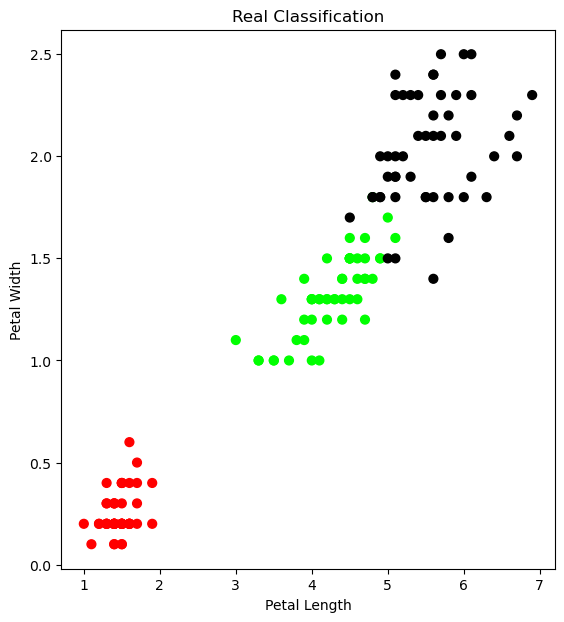

In [14]:
plt.figure(figsize=(14,7))

colormap = np.array(['red', 'lime', 'black'])

# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

The accuracy score of K-Mean:  0.24
The Confusion matrixof K-Mean:  [[ 0 50  0]
 [48  0  2]
 [14  0 36]]


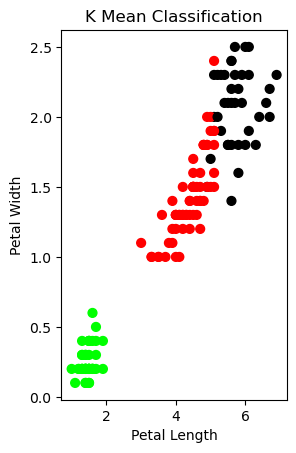

In [15]:
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of K-Mean: ',sm.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean: ',sm.confusion_matrix(y, model.labels_))

The accuracy score of EM:  0.35333333333333333
The Confusion matrix of EM:  [[ 5  0 45]
 [ 2 48  0]
 [ 0 50  0]]


C:\Users\VIVEK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


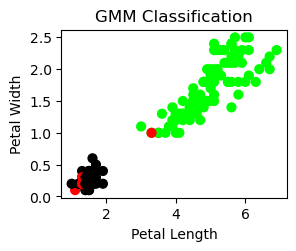

In [16]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
#xs.sample(5)

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

y_gmm = gmm.predict(xs)
#y_cluster_gmm

plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print('The accuracy score of EM: ',sm.accuracy_score(y, y_gmm))
print('The Confusion matrix of EM: ',sm.confusion_matrix(y, y_gmm))

### 4. Demonstrate Pre processing (Data Cleaning, Integration and Transformation) activity on suitable data: For example: Identify and Delete Rows that Contain Duplicate Data by considering an appropriate dataset. Identify and Delete Columns That Contain a Single Value by considering an appropriate dataset.

In [17]:
import numpy as np
import pandas as pd
import os

In [18]:
dataset = pd.read_csv("Data.csv")
print ('dataset: %s'%(str(dataset.shape)))

dataset: (15, 4)


In [19]:
dataset

,Country,Age,Salary,Purchased
0,India,34.0,92000.0,Yes
1,Sri lanka,22.0,25000.0,Yes
2,China,31.0,74000.0,Yes
3,Sri lanka,29.0,NaN,No
4,China,55.0,98000.0,Yes
5,India,24.0,30000.0,No
6,Sri lanka,28.0,40000.0,No
7,India,NaN,60000.0,No
8,China,51.0,89000.0,Yes
9,India,44.0,78000.0,Yes


In [20]:
X = dataset.iloc[:,:-1].values

Y = dataset.iloc[:,3].values

In [21]:
print ('X: %s'%(str(X)))
print ('-----------------------------------')
print ('Y: %s'%(str(Y)))

X: [['India' 34.0 92000.0]
 ['Sri lanka' 22.0 25000.0]
 ['China' 31.0 74000.0]
 ['Sri lanka' 29.0 nan]
 ['China' 55.0 98000.0]
 ['India' 24.0 30000.0]
 ['Sri lanka' 28.0 40000.0]
 ['India' nan 60000.0]
 ['China' 51.0 89000.0]
 ['India' 44.0 78000.0]
 ['Sri lanka' 21.0 20000.0]
 ['China' 25.0 30000.0]
 ['India' 33.0 45000.0]
 ['India' 42.0 65000.0]
 ['Sri lanka' 33.0 22000.0]]
-----------------------------------
Y: ['Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'No']


In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X[:,1:3])
X[:,1:3] = imputer.transform(X[:,1:3])

In [23]:
print ('X: %s'%(str(X)))

X: [['India' 34.0 92000.0]
 ['Sri lanka' 22.0 25000.0]
 ['China' 31.0 74000.0]
 ['Sri lanka' 29.0 54857.142857142855]
 ['China' 55.0 98000.0]
 ['India' 24.0 30000.0]
 ['Sri lanka' 28.0 40000.0]
 ['India' 33.714285714285715 60000.0]
 ['China' 51.0 89000.0]
 ['India' 44.0 78000.0]
 ['Sri lanka' 21.0 20000.0]
 ['China' 25.0 30000.0]
 ['India' 33.0 45000.0]
 ['India' 42.0 65000.0]
 ['Sri lanka' 33.0 22000.0]]


In [24]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])
X[:,0]

array([1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1, 1, 2], dtype=object)

In [25]:
labelencoder_Y = LabelEncoder()
Y = labelencoder_X.fit_transform(Y)
Y

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0])

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [27]:
print ('X_train: %s'%(str(X_train.shape)))
print ('----------------')
print ('X_test: %s'%(str(X_test.shape)))
print ('----------------')
print ('Y_train: %s'%(str(Y_train.shape)))
print ('----------------')
print ('Y_test: %s'%(str(Y_test.shape)))
print ('----------------')

X_train: (12, 3)
----------------
X_test: (3, 3)
----------------
Y_train: (12,)
----------------
Y_test: (3,)
----------------


In [28]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train).astype(int)
X_test = sc_X.transform(X_test)

In [29]:
X_train

array([[ 0,  1,  0],
       [ 1,  0, -1],
       [-1,  2,  1],
       [-1,  0,  0],
       [ 0,  0,  0],
       [ 1, -1, -1],
       [ 0,  0,  0],
       [-1,  0, -1],
       [ 1,  0,  0],
       [ 0,  0,  1],
       [ 0, -1, -1],
       [ 0,  0,  0]])

In [30]:
X_test

array([[ 1.41421356, -1.29089245, -1.19871456],
       [ 1.41421356, -0.63037489, -0.61374928],
       [-1.41421356,  1.90160908,  1.29713729]])

In [31]:
del dataset["Purchased"]
dataset

,Country,Age,Salary
0,India,34.0,92000.0
1,Sri lanka,22.0,25000.0
2,China,31.0,74000.0
3,Sri lanka,29.0,NaN
4,China,55.0,98000.0
5,India,24.0,30000.0
6,Sri lanka,28.0,40000.0
7,India,NaN,60000.0
8,China,51.0,89000.0
9,India,44.0,78000.0


### 5. For a given set of training data examples stored in a .CSV file,implement and demonstrate the Candidate-Elimination algorithm. Output adescription of the set of all hypotheses consistent with the training examples.

In [32]:
import numpy as np
import pandas as pd
data = pd.DataFrame(data=pd.read_csv('trainingdata.csv'))
concepts = np.array(data.iloc[:,0:-1])
print(concepts)
target = np.array(data.iloc[:,-1])
print(target)
def learn(concepts, target):

    specific_h = concepts[0].copy()
    print("\nInitialization of specific_h and general_h")
    print(specific_h)

    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print(general_h)
    for i, h in enumerate(concepts):
        if target[i] == "Yes":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
        if target[i] == "No":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'

        print("\nSteps of Candidate Elimination Algorithm",i+1)
        print(specific_h)
        print(general_h)
    
    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h
s_final, g_final = learn(concepts, target)
print("\nFinal Specific_h:", s_final, sep="\n")
print("\nFinal General_h:", g_final, sep="\n")

[['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
 ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
 ['Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
 ['Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change']]
['Yes' 'Yes' 'No' 'Yes']

Initialization of specific_h and general_h
['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Steps of Candidate Elimination Algorithm 1
['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Steps of Candidate Elimination Algorithm 2
['Sunny' 'Warm' '?' 'Strong' 'Warm' 'Same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?'

### 6. Implement and demonstrate the FIND-S algorithm for finding the most specific hypothesis based on a given set of training data samples. Read the training data from a .CSV file and show the output for test cases. Develop an interactive program by Comparing  the result by implementing LIST THEN ELIMINATE algorithm.

In [1]:
import pandas as pd

def list_then_eliminate(training_data):
    positive_examples = training_data[training_data['Play'] == 'No']
    
    if positive_examples.empty:
        return None
    
    hypothesis = positive_examples.iloc[0, :-1]
    
    for _, example in training_data.iterrows():
        if example['Play'] == 'No':
            for attr in hypothesis.keys():
                if example[attr] != hypothesis[attr]:
                    hypothesis[attr] = '?'
    
    return hypothesis

# Load the training data
training_data = pd.read_csv('dataset 1.csv')
print(training_data)

    Outlook Temperature Humidity  Windy Play
0     Sunny         Hot     High  False   No
1  Overcast         Hot     High  False  Yes
2      Rain        Mild     High  False  Yes
3      Rain        Cool   Normal  False  Yes
4     Sunny        Mild   Normal   True  Yes


In [2]:
# Run the LIST THEN ELIMINATE algorithm
hypothesis_space = list_then_eliminate(training_data)

# Output the hypothesis space
print("Hypothesis space:")
print(hypothesis_space)


Hypothesis space:
Outlook        Sunny
Temperature      Hot
Humidity        High
Windy          False
Name: 0, dtype: object
